# Data Visualization in Python

Data visualization is the graphic representation of data. It involves producing images that communicate relationships among the represented data to viewers of the images. This communication is achieved through the use of a systematic mapping between graphic marks and data values in the creation of the visualization. [Source: Wikipedia]

Python offers many visualization libraries, that allow us to create rich, interactive, and customized visualizations for effective communication of insights from data.

Following are some popular visualization (aka. graphing) libraries in Python,
- `matplotlib`: Provides low level constructs to customize graphs
- `pandas` visualization: User-friently interface, built on Matplotlib
- `seaborn`: High-level abstractions with ready-to-use styles
- `ggplot`: Based on R’s `ggplot2`
- `plotly`: Supports interactive plots

We will learn, how to create basic plots using `matplotlib`, `pandas` visualization, and `seaborn`.

## Import Datasets

We will use two datasets that are available freely on the internet. The __Iris__ and __Wine Reviews__ dataset.

In [1]:
import pandas as pd
iris = pd.read_csv('/Users/pranavshastri/Downloads/iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0


In [2]:
wine_reviews = pd.read_csv('/Users/pranavshastri/Downloads/drive-download-20200406T091401Z-001/Python Lesson 07/Data_set_visualisation/winemag-data-130k-v2.csv', index_col=0)
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Different Charts with `matplotlib`

`matplotlib` is a popular Python plotting library. It is a library with __Matlab__ like interface that offers a versatile set of options.

To install `matplotlib`, `pip` and `conda` can be used.

`pip install matplotlib`

or

`conda install matplotlib`

`matplotlib` is specifically good for creating basic graphs like line charts, bar charts, histograms and many more.

In [3]:
import matplotlib.pyplot as plt    # To import matplotlib

### Scatter Plot with `matplotlib`

To create a scatter plot in `matplotlib` we use the `scatter` method.

Text(0, 0.5, 'Sepal Width')

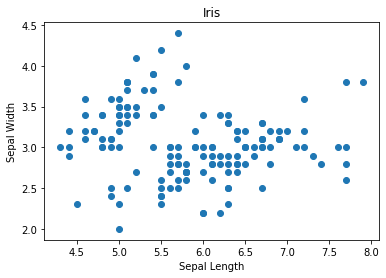

In [4]:
# Step 1: Create a figure and axis
fig, ax = plt.subplots()

# Step 2: Plot sepal_length against the sepal_width (as scatter plot)
ax.scatter(iris['sepal_length'], iris['sepal_width'])    # scatter function to create scatter plot

# Step 3: Set a Title for the plot and labels for the Axes
ax.set_title('Iris')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

### Line Chart  with `matplotlib`

To create a line chart in `matplotlib` we use the `plot` method. It is possible to plot multiple columns in a single line chart against the same axes.

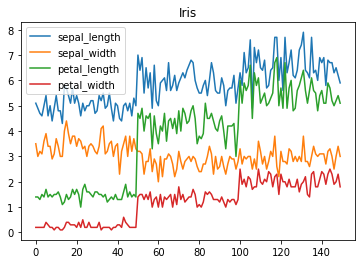

In [5]:
# We don't need the class labels, hence drop them
columns = iris.columns.drop(['class'])

# Create X. To plot multiple columns, it is better to have same X.
x_data = range(0, iris.shape[0])

# Create the figure with axis
fig, ax = plt.subplots()

# Let's plot each column
for column in columns:
    ax.plot(x_data, iris[column], label=column)

# Set the chart title and the legend
ax.set_title('Iris')
ax.legend()

### Histogram with `matplotlib`

To create a histogram in `matplotlib` we use the `hist` method. For categorical data, the method computes the frequency of occurrence of each class automatically.

In [ ]:
# Create the figure and the axis
fig, ax = plt.subplots()

# Plot the Histogram
ax.hist(wine_reviews['points'])

# Set the histogram title and axes labels
ax.set_title('Scores: Wine Review')
ax.set_xlabel('Points')
ax.set_ylabel('Frequency')

# TASK: Change the number of bins in the histogram and re-plot the histogram

### Bar Chart  with `matplotlib`

To create a bar chart in `matplotlib` we use the `bar` method. Unlike `hist`, the `bar` method does NOT automatically computes frequency of the data, hence we need to explicitly compute the frequency and pass it to the `bar` method. The bar-chart is a  useful tool for categorical data where number of categories to visualize are not too many.

NameError: name 'wine_reviews' is not defined

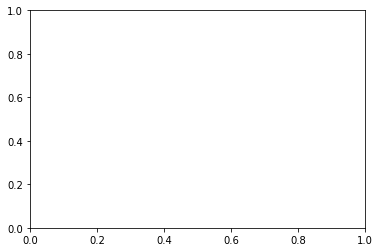

In [7]:
# Create the figure and the axis 
fig, ax = plt.subplots() 

# Compute frequency for each class 
data = wine_reviews['points'].value_counts()

# Prepare X (points) and y (frequency) 
points = data.index 
frequency = data.values 

# Create the bar chart 
ax.bar(points, frequency)

# Set the chart title and axes labels 
ax.set_title('Scores: Wine Review') 
ax.set_xlabel('Points') 
ax.set_ylabel('Frequency')

___

## Plotting with `pandas`

`pandas` is also popular Python plotting library. Here we look at creating basic plots with `pandas`. For more elaborated treatment, please refer https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

### Scatter Plot with `pandas`

To create a scatter plot, invoke `<dataset>.plot.scatter()` and pass it two arguments, 
- the name of the x-column 
- the name of the y-column 

Optionally, we can also pass the function a title for the plot. Let's create a scatter plot on the __Iris__ dataset.

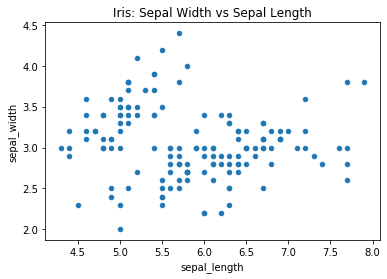

In [8]:
iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris: Sepal Width vs Sepal Length') 
# X and y labels will be automatically set

### Line Chart with `pandas`

To create a line-chart, invoke `<dataframe>.plot.line()`. Pandas automatically plots all available numeric columns (we don't have to loop-through each one of them as in `matplotlib`) 

In [ ]:
iris.drop(['class'], axis=1).plot.line(title='Iris Dataset') # We don't need the 'class' column for line chart.

If we have more than one feature Pandas automatically creates a legend for us, as can be seen in the image above.

### Histogram with `pandas`

Invoke the `<dataframe>.plot.hist` method to create a histogram. We can optionally pass the bin size.

In [ ]:
wine_reviews['points'].plot.hist()

In [ ]:
# Let's create multiple histograms!
# subplots argument specifies a separate plot for each column 
# layout specifies the number of rows of plots and number of plots per row
iris.plot.hist(subplots=True, layout=(3, 2), figsize=(10, 10), bins=20)

### Bar Chart with `pandas`

To create a bar-chart, use the `plot.bar()` method. However, we need to prepare our data first. We need to,
- Count the occurrences of each point using the value_count() method
- Sort the occurrences from smallest to largest using the sort_index() method

In [ ]:
wine_reviews['points'].value_counts().sort_index().plot.bar()

In [ ]:
# Let's make a horizontal bar-chart!
wine_reviews['points'].value_counts().sort_index().plot.barh()

We can also plot other data then the number of occurrences.


In [ ]:
# Plot mean price of wine by country, for the 5 countries with highest wine price
wine_reviews.groupby("country").price.mean().sort_values(ascending=False)[:5].plot.bar()

___

## Plotting with `seaborn`

`seaborn` is another popular high-level Python data visualization library. Users can easily create graphs with a single line of code. Besides, its standard designs are visually appealing and it works well wth `pandas` data frames.

To install `seaborn`, `pip` and `conda` can be used.

`pip install seaborn`

or

`conda install seaborn`

In [ ]:
import seaborn as sns # standard import

### Scatter Plot with `seaborn`

We use `scatterplot` method to create a scatterplot. In additon to pasing the column names (as in Pandas), we need to pass the data as an argument to the function, as we are not invoking the method on any data object.

In [ ]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)

In [ ]:
# Let's highlight the points, with their respective class colors
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

### Histogram with `seaborn`

`sns.distplot` method is used to visualize a histogram. We need to pass it the column we want to plot and it will calculate the occurrences itself. Optionally we can also pass to the method, the number of bins. By default, the method also plots a gaussian kernel density estimate.

In [ ]:
sns.distplot(wine_reviews['points'], bins=10)

In [ ]:
sns.distplot(wine_reviews['points'], bins=20, kde=False)

## Bar Chart with `seaborn`

It is trivial to create a bar chart with `seaborn`. We call the method `sns.countplot` and pass data to it.

In [ ]:
sns.countplot(wine_reviews['points'])

___

## Other Useful Graphs


### Box Plot

A Box plot is a graphical method to creatively visualize the five-number summary! Following are the five numbers that are visualized in a box plot,

- Minimum: the lowest data point excluding any outliers.
- Maximum: the largest data point excluding any outliers.
- Median (Q2 / 50th Percentile): the middle value of the dataset.
- First quartile (Q1 / 25th Percentile): is also known as the lower quartile qn(0.25) and is the middle value between the smallest number (not the minimum) and the median of the dataset.
- Third quartile (Q3 / 75th Percentile): is also known as the upper quartile qn(0.75) and is the middle value between the largest number (not the maximum) and the median of the dataset.

With seaborn we create box plots using `boxplot` method

In [ ]:
df = wine_reviews[(wine_reviews['points']>=95) & (wine_reviews['price']<1000)]
sns.boxplot('points', 'price', data=df)

### Heatmap

A heat map (or heatmap) is a graphical representation of data where the individual values contained in a matrix are represented as colors. "Heat map" is a newer term but shading matrices have existed for over a century. [Source: Wikipedia]

Typical usage of heatmap is to visualize correlationship between two variables/columns/features. By using Pandas, `<dataset>.corr()` we get the correlationship matrix.
    
Creating heatmap with `seaborn` is trivial, whereas with `matplotlib` it requires a lot of effort.

__Heatmap with `seaborn`__

In [ ]:
sns.heatmap(iris.corr(), annot=True)   # Very easy!

__Heatmap with `matplotlib`__

In [ ]:
# Heatmap without annotations!

import numpy as np

# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

To add annotations to the heatmap we need to add two for loops:

In [ ]:
# For annotations we need to do more work!

# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")

### Pairplot

What if we want to plot a grid of pairwise relationships in a dataset? We use `pairplot` for the same. Let's use `seaborn` and `pandas` to visualize a `pairplot`.

In [ ]:
sns.pairplot(iris)

In [ ]:
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(12,12))
scatter_matrix(iris, alpha=1, ax=ax)

As seen in the visualizations above, each visualization in the `pairplot` has two features visualized agains each other. The diagonal figures are histograms and rest of plots are scatter plots.

## Plotting Categorical Data

Plots visually express relationship between variables. If one of the main variables in the plot is categorical then we can use specialy plots for better visualization.

Seaborn has different types of categorical plots,
- Scatterplots (stripplot, swarmplot)
- Distribution plots (boxplot, violinplot, boexnplot)
- Estimate plots (pointplot, barplot, countplot)

We will briefly study `catplot()` that is a high level interface to each of the above plots.

### Categorical Scatterplot

The primary challenge here is that all the points belonging the same category will fall on the same axis corresponding to the category variable. The approach to address this challenge, is to add a small amount of random jitter.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [ ]:
tips = sns.load_dataset("tips")
print(tips.head())
sns.catplot(x="day", y="total_bill", data=tips)    # this is similar to stripplot

In [ ]:
# Let's suppress the jitter and visualize the same graph
# Here the overlapping values are not distinguishable for each category
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

In [ ]:
# Another approach to handle this problem is to adjust overlapping points along the 
# category variable axis. Gives a better visualization for small datasets
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

In [ ]:
# Let's add another dimension by using the Hue semantics
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

### Plotting Distributions

As the size of the data increases, scatterplots become less useful. We move onto distribution plots in such cases. Boxplot is a type of distribution plot that we have already seen earlier.

Let's plot a boxplot with an additional dimension with `catplot()`.

In [ ]:
# We add a hue semantic, to get distribution for different types of smokers
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

Another type of plot, called __Violin Plot__, gives us richer description (using Kernel Density Estimate) of the distribution of values for category variables. Quartile and whisker values from boxplot are available inside the violin.

In [ ]:
# The downside is that the function needs additional parameters to plot the distribution
sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", bw=.15, cut=0, data=tips)

We can combine `swarmplot()` or `striplot()` with a box plot or violin plot to show each observation along with a summary of the distribution.

In [ ]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax)

## Statistical Estimation within Categories

Instead of showing distribution within each category, at times we want to display an estimate of the central tendency of the values. There are two main ways to do this,
- Bar Plots
- Point Plots

### Bar Plots

In [ ]:
# Plot of "Sex" against statistic estimate (default mean) of the survived people in each class
# Plots a bar for each category value alongwith confidence interval
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

### Count Plots

In [ ]:
# Plot histogram of categorical variable (deck)
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic)

### Point Plots

In [ ]:
# Another way to visualize the relationship between category values and statistical estimates
# Rather than showing a full bar, it plots the point estimate and confidence interval
# Connects points from the same hue category, allowing us to easily visualize how the relationship is 
# changing as a function of hue semantic
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic)

## Practice Work

Write Python programs to,
- Draw multiple lines, with axes labels, chart title, suitable legends and line markers
- Plot temperature vs humidity for last 10 days. Beautify the plot!

## Source(s)

- https://towardsdatascience.com/introduction-to-data-visualization-in-python-89a54c97fbed
- https://seaborn.pydata.org/tutorial/categorical.html